## **Predicting Diagnosis Of Heart Disease**

### **Introduction**

Heart disease has been the leading cause of death in many countries. The term heart disease describes a range of conditions that could affect the heart. The most common heart diseases are coronary heart disease, peripheral artery disease, and aortic disease. (CDC,2023)
Studies show that the leading risk factors for these diseases include cholesterol levels and maximum heart rate. In particular, adults age 65 and older are more likely than younger people to suffer from heart disease beacause aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease (U.S. Department of Health, n.d.). Consequently, our goal is to identify which heart health indicators most significantly contributes to the identification of heart disease, and use knn classifier algorith to classify an indivial as either likley or not likely to have heart disease based off the predictors. 

Thus, our research question is:
**Which predictors best correlates with the characterization of heart disease and can these predictors be used to build an accurate classification model to predict whether a new patient is likely to have heart disease?**

This classification uses processed.cleveland.data retreived from the *UCI Machine Learning Repository: Heart Disease Database* to predict if a new patient is likely to have heart disease. 

### **Methods**
*Preprocessing and exploratory data analysis*

1. We will import the dataset from the internet onto jupyter notebook. This is using read_csv to import the processed.cleveland.data dataset from the online directory.

2. We will tidy the dataset to make it usable. There is many properties of the dataset that needs to be tidied. 

3. Split the data into training and testing sets, working only with the training set until the very end. We will create a model(s) to learn to predict a target variable based on other variables.

4. After this, we will use GGPairs and box plots to find the best predictors.

5. Summarize the training set to make predictions about how we want our classifier to work. This is done by grouping by diagnosis, and summarize the mean of all of the numeric columns

6. Create a classification model using chosen predictors and get the accuracy of our model. To find the accuracy of the model, we will do fine-tuning to prove that the model created works well and use cross validation to make sure it can work on unseen data.

7. Visualization of Analysis


### **1. Reading the Libraries into JupyterHub**

In [5]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading Dataset into JupyterHub

In [6]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


### **2. Wrangling**

The data uses 14 attributes:

1. `age`: age of the patient(years)
2. `sex`: sex of the patient(M: Male, F: Female)
3. `cp`: chest pain type(TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. `trestbps`: resting blood pressure(#)
5. `chol`: serum cholesterol in mg/dl(#)
6. `fbs`: fasting blood sugar > 120 mg/dl(Binary)(1=true; 0=false)
7. `restecg`: resting electrocardiography results(values 0,1,2)
8. `thalach`: maximum heart rate achieved (#)
9. `exang`: exercise induced angina (binary) (1 = yes; 0 = no)
10. `oldpeak`: oldpeak = ST (Numeric value measured in depression)
11. `slope`: of the peak exercise ST segment (Ordinal)(Value 1: up sloping , Value 2: flat , Value 3: down sloping)
12. `ca`: number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. `thal`: maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect
14. `num` (the predicted attribute)

The predicted attribute for the diagnosis of heart disease is `num`. According to the dataset description on *UCI Heart Disease Database*, the diagnosis of heart disease is an angiographic disease status. The angiographic disease status is defined as a binary label (diseased or not) based on the fact if there is more than 50% diameter narrowing in any of the major blood vessels in a patient (Balashankar et al., 2021). Therefore, in this project, a value of 0 suggests less than 50% diameter narrowing in blood vessels, which indicates the patient is not likley to have heart disease. A value of 1 suggests greater than 50% diameter narrowing in blood vessels, which indicates the patient is likley to have heart disease. 

### Tidying Data

The predicted attribte is the "num" column which indicates the diagnosis of heart disease. According to the data description, a value of 0 represents no presence of heart disease; any value that is not 0 represents presense of heart disease. To change the predicted attribute to be catagorical, the ifelse function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (presence of heart disease) or 1 (no presence heart disease).

In addition, all the values in the data are numeric, even the catagorical variables. Therefore, the `as.factor` function will be used to convert numeric data to catagorical.

In [26]:

cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), 
           fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang),
           thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num) |>
head(10)
cleve_clean

age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1



### Check Missing Values A BETTER METHOD???


Checking for missing values in the dataset. The process revolves around inspecting each and single dataframe and check for non numerical values that do not fit into our goal of data analysis. This process can be complex as the data that we inspect do not measure missing data as "NA", but rather "?", such that the functions to detect NAs such as "is.na" could not be used. As such, the method used to filter for "?" in our data is to isolate each variable and look for "?". As a result, we found "?" in the "age", "cholesterol" and "thalach" columns, which does not affect the variables that we are interested in.

In [8]:
data[data == "?" ] <- NA 
data |>
  select(everything()) |>
  summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,4,2,0


In [9]:

#checking for missing data
missing1 <- data |> 
summarize(age) |>
filter(age == "?")


missing2 <- data |> 
summarize(thalach) |>
filter(thalach == "?")

missing3 <- data |> 
summarize(cholesterol) |>
filter(cholesterol == "?")

missing1
missing2
missing3

#there seems to be no missing data as the is no "?" in the predictor columns

age
<dbl>


thalach
<dbl>


cholesterol
<dbl>


### **2. Summarizing Data**

Since the goal is to create a classification model, we are only going to consider numerical variables. Hence, we are calculating the mean of all numerical variables. 

In [10]:
#summarizing data

summarize_all <- cleve_clean |>
                    group_by(diagnosis) |>
                    summarize(age = mean(age),
                              blood_pressure = mean(blood_pressure),
                              cholesterol = mean(cholesterol),
                              thalach = mean(thalach),
                              oldpeak = mean(oldpeak),
                              patient_count = n())

summarize_all

diagnosis,age,blood_pressure,cholesterol,thalach,oldpeak,patient_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.58537,129.2500,242.6402,158.378,0.5865854,164
1,56.62590,134.5683,251.4748,139.259,1.5741007,139


In [11]:
#Display how many people diagnosed HD
diagnosis_cleve <- cleve_clean |>
                   group_by(diagnosis) |>
                   summarize(patient = n())
diagnosis_cleve

diagnosis,patient
<fct>,<int>
0,164
1,139


### **3. Visualizing Data** 

For our visualization, we will be using ggpairs and scatterplots to visually check if there exist some relation between numeric variables. GGpairs function will also be used to observe the correlation between the attributes. After using these plots you we can then identify which parameters are more indicative than others. In particular, since the goal is to create a classification model, we are only going to select only numerical variables. 

**GGPairs**

Use the GGpairs function to find the correlation between our variables. In specific, GGpairs function will help us produce a scatterplot matrix of all variables of interest which we can then find the best predictors to use.

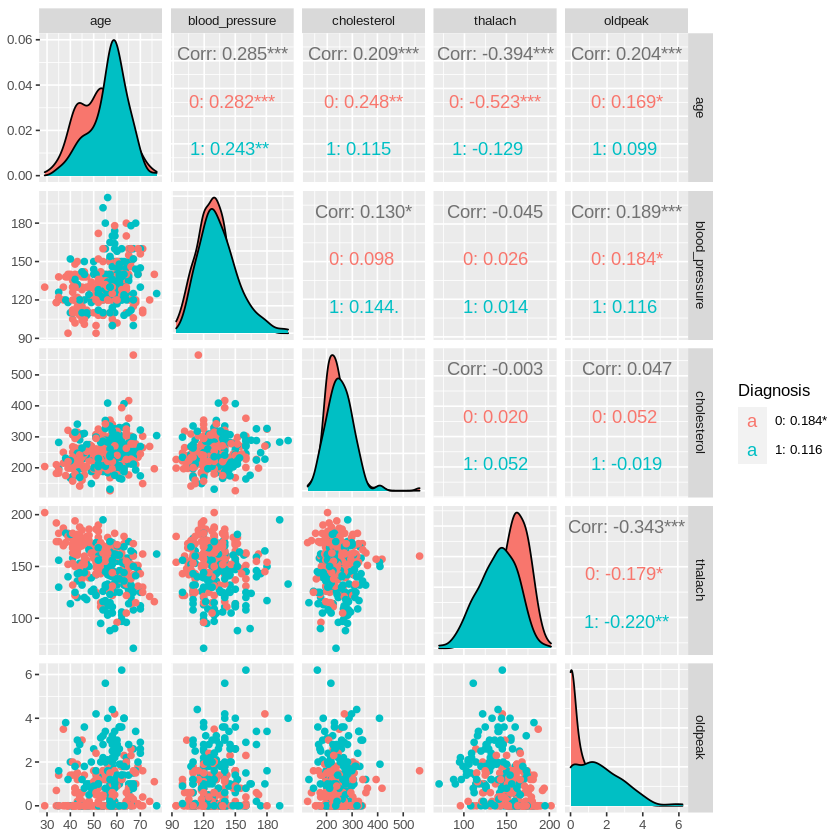

In [12]:

number_data <- cleve_clean|>
select(age, blood_pressure, cholesterol, thalach, oldpeak, diagnosis)

ggpairsplot <- number_data |>
ggpairs(legend= 10, columns = 1:5, aes(color = diagnosis)) +
 labs(color="Diagnosis")+

          theme(plot.title = element_text(hjust = 1),
                axis.text.x = element_text(hjust = 1, color = "black",size=5),
                axis.text.y = element_text(hjust = 1, color = "black",size=5),
                legend.position = "bottom")+
        　 
          theme_grey(base_size = 10)


ggpairsplot

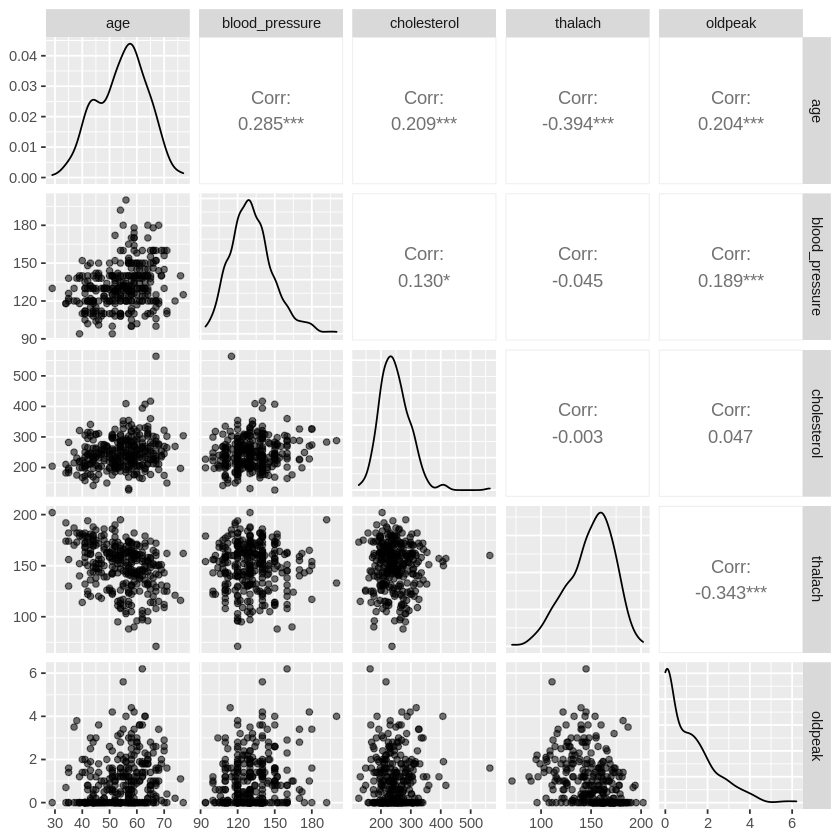

In [13]:
# using ggpairs to identify which predictors to use

number_data <- cleve_clean|>
select(age, blood_pressure, cholesterol, thalach, oldpeak)

ggpairsplot <- ggpairs(number_data,mapping = aes(alpha = 0.4))
ggpairsplot

A high correlation means that the variables have a strong relationship with each other. From the ggpairs graph above, we can see that the variables with the largest correlation to the likelihood of heart disease are `thalach` and `age`. Thus, we can use this to justify using these two variables as our predictors. 


**Box Plots**

In addition to using ggpairs, we will use box plots to compare all numeric variables to diagnosis. Box plots will display the basic statistics of the data, as well as its distribution. The plots will be used to compare the distribution of a given variable across some categories. For example, the box plot for predictor age will show the average age of individuals who do not have heart disease(left yellow box) and the average of those individuals diagnosed with heart disease(right green box).

There are five plots below,
age, ST depression(oldpeak), cholesterol, blood pressure and max heart rate(thalach).

By looking at the box plot graphs we can see that max heart rate(`thalach`) and age have the most difference in population mean values. For the age plot, it appears that those who are older have a higher chance in having heart disease, while max heart rate plot displays people with lower max heart rate have heart disease.

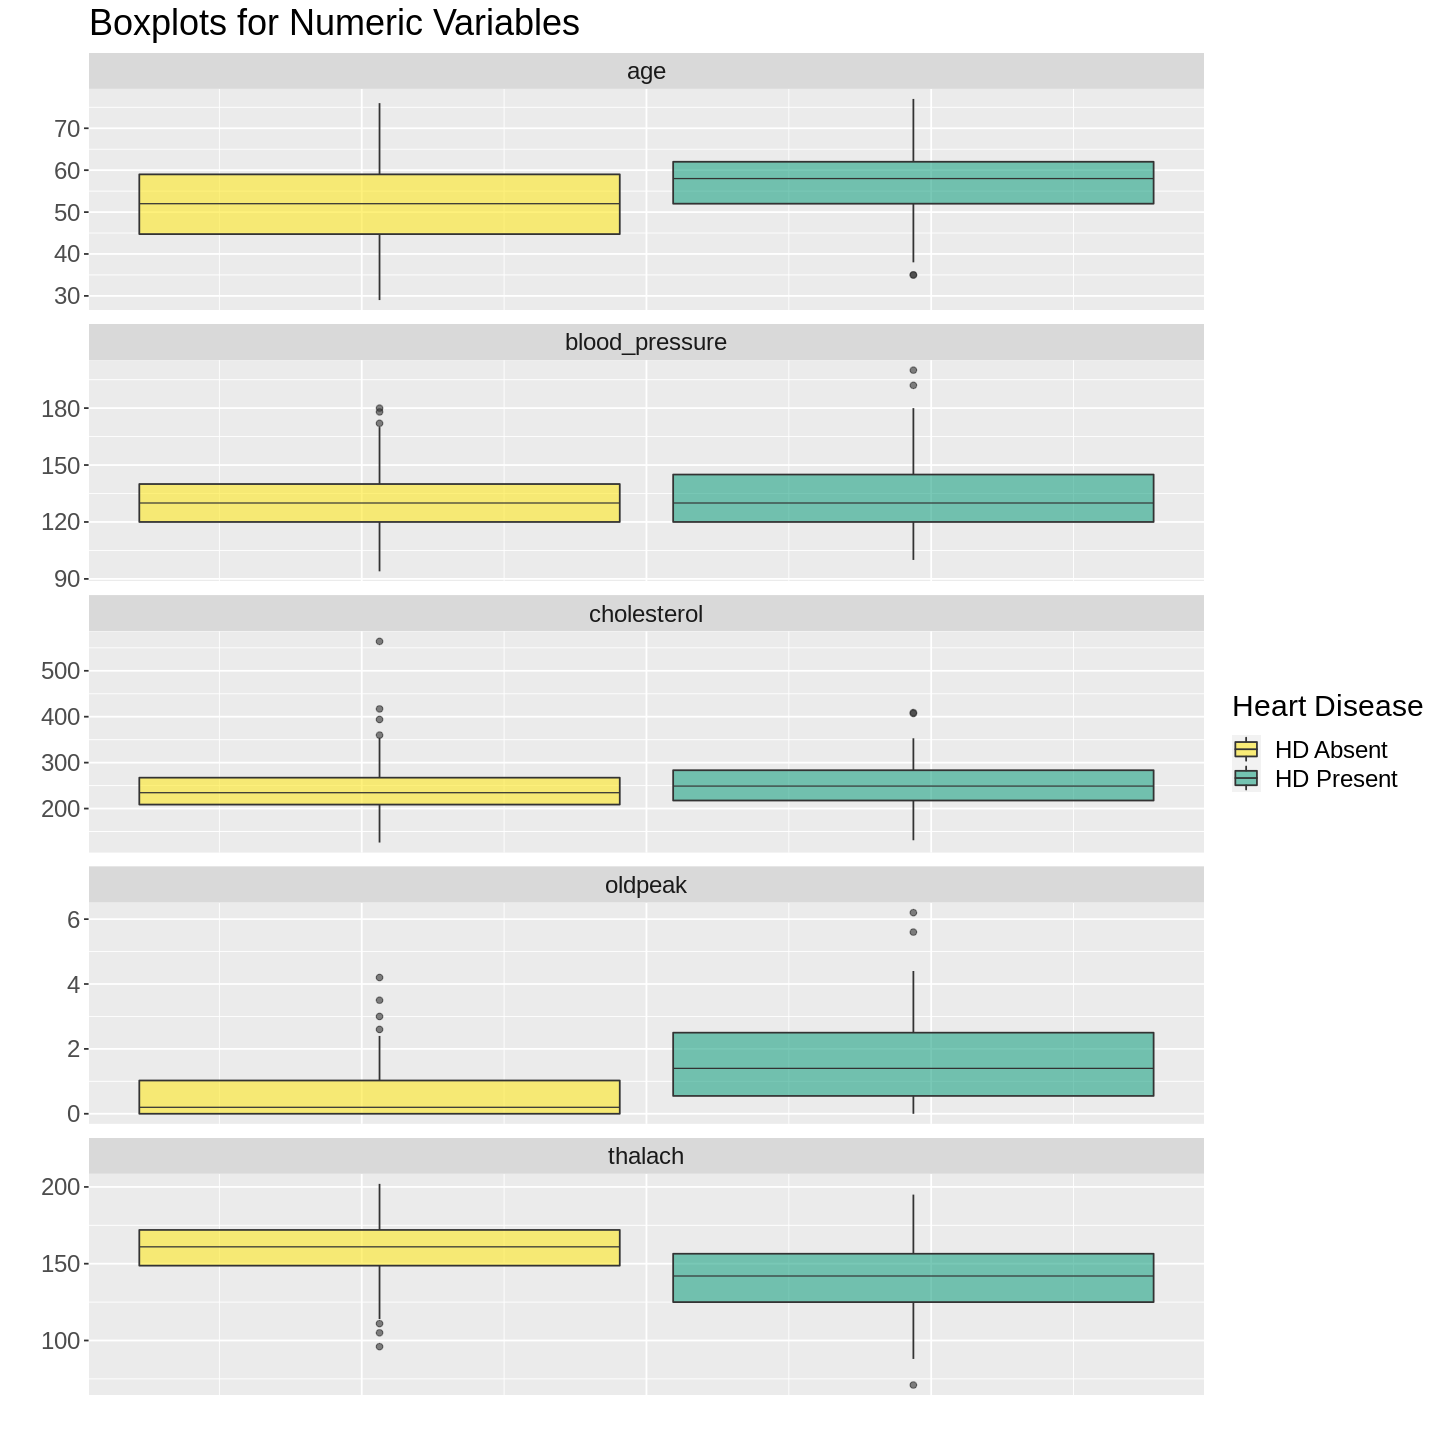

In [25]:
options(repr.plot.width = 12, repr.plot.height = 12)

filter_cleve <- cleve_clean  |>
  select(age,
         thalach,
         blood_pressure,
         cholesterol,
         oldpeak,
         diagnosis) %>% 
  gather(key   = "key", 
         value = "value",
         -diagnosis)

boxplot <- filter_cleve |>
  ggplot(aes(y = value)) +
       geom_boxplot(aes(fill = diagnosis),
                      alpha  = .6,
                      fatten = .7) +
        labs(x = "",
             y = "",
             title = "Boxplots for Numeric Variables") +
      scale_fill_manual(
            values = c("#fde725ff", "#20a486ff"),
            name   = "Heart Disease",
            labels = c("HD Absent", "HD Present")) +
      theme(
         axis.text.x  = element_blank(),
         axis.ticks.x = element_blank(), text = element_text(size=18)) +
      facet_wrap(~ key, 
                 scales = "free", 
                 ncol   = 1)
      
boxplot


### facet_grid

To confirm there is a relationship bewteen age and maximum heart rate, we are plotting `age` vs `thalach` for patients who have heart disease and who do not have heart disease. Patients with lower age seems to have higher maximum heart rate while patients who are older seem to have lower maximum heart rate. This confirms that there is a strong negative relationship between `age` and `thalach`.

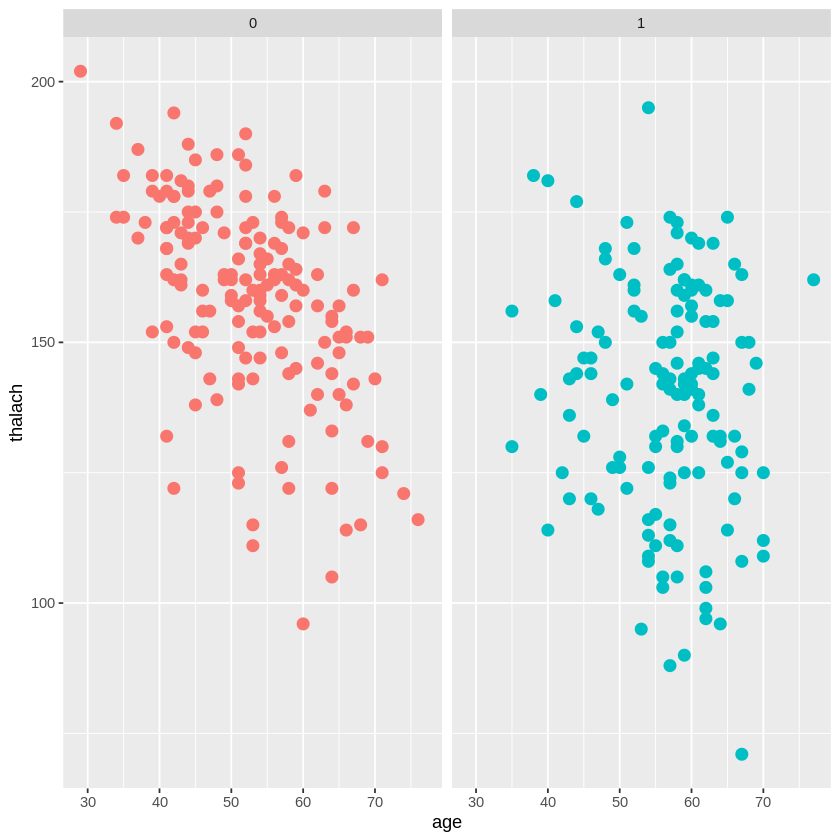

In [14]:
ggplot(cleve_clean , aes(x=age, y=thalach, color=diagnosis)) + 
  geom_point(size=3) +  
  facet_wrap(~diagnosis) +
  theme(legend.position="none")

### **4. Splitting the Data**

Using the initial_split() function to split the data into a training and test set. Then Set the strata argument to the target variable. Note: we put the test set aside for now.

In [17]:
#splitting data
cleve_split <- initial_split(cleve_clean, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)


### **5. Classification**

The overall workflow for performing K-nearest neighbour classification using tidymodels is as follows: **from dsci review pack**

1. Use the vfold_cv() function to split up the training data for cross validation.

2. Create a recipe that specifies the target and predictor variables, as well as preprocessing steps for all variables. Pass the training data as the data argument of the recipe

3. Create a nearest_neighbors model specification, with neighbors = tune().

4. Add the recipe and model specification to a workflow(), and use the tune_grid() function on the train/validation splits to estimate the classifier accuracy for a range of values.

5. Pick a value of that yields a high accuracy estimate that does not change much if you change to a nearby value. In the K-nearest neighbours classification algorithm, we choose the label/class for a new observation by taking the mode (value that appears most often, i.e., the majority vote) label/class of the K nearest neighbours.

6. Make a new model specification for the best parameter value, and re-train the classifier using the fit() function.

7. Evaluate the estimated accuracy of the classifier on the test set using the predict function.

In [18]:
set.seed(113)

cleve_recipe <- recipe(diagnosis ~ age + thalach, data = cleve_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
cleve_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [19]:
# neighbors = tune() is used when we want to test the accuracies for a range of different parameter values.
set.seed(113)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

cleve_vfold <- vfold_cv(cleve_training, v = 10, strata = diagnosis)

gridvals <- tibble(neighbors = seq(1, 50))

cleve_result <- workflow() |>
       add_recipe(cleve_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = cleve_vfold, grid = gridvals) |>
      collect_metrics() |>
        filter(.metric == "accuracy")
cleve_result

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6133399,10,0.02698990,Preprocessor1_Model01
2,accuracy,binary,0.6178854,10,0.02939727,Preprocessor1_Model02
3,accuracy,binary,0.6199605,10,0.03121478,Preprocessor1_Model03
4,accuracy,binary,0.6199605,10,0.03121478,Preprocessor1_Model04
5,accuracy,binary,0.6769433,10,0.03566415,Preprocessor1_Model05
6,accuracy,binary,0.6769433,10,0.03566415,Preprocessor1_Model06
7,accuracy,binary,0.6820652,10,0.03134340,Preprocessor1_Model07
8,accuracy,binary,0.6820652,10,0.03134340,Preprocessor1_Model08
9,accuracy,binary,0.6867918,10,0.03077725,Preprocessor1_Model09


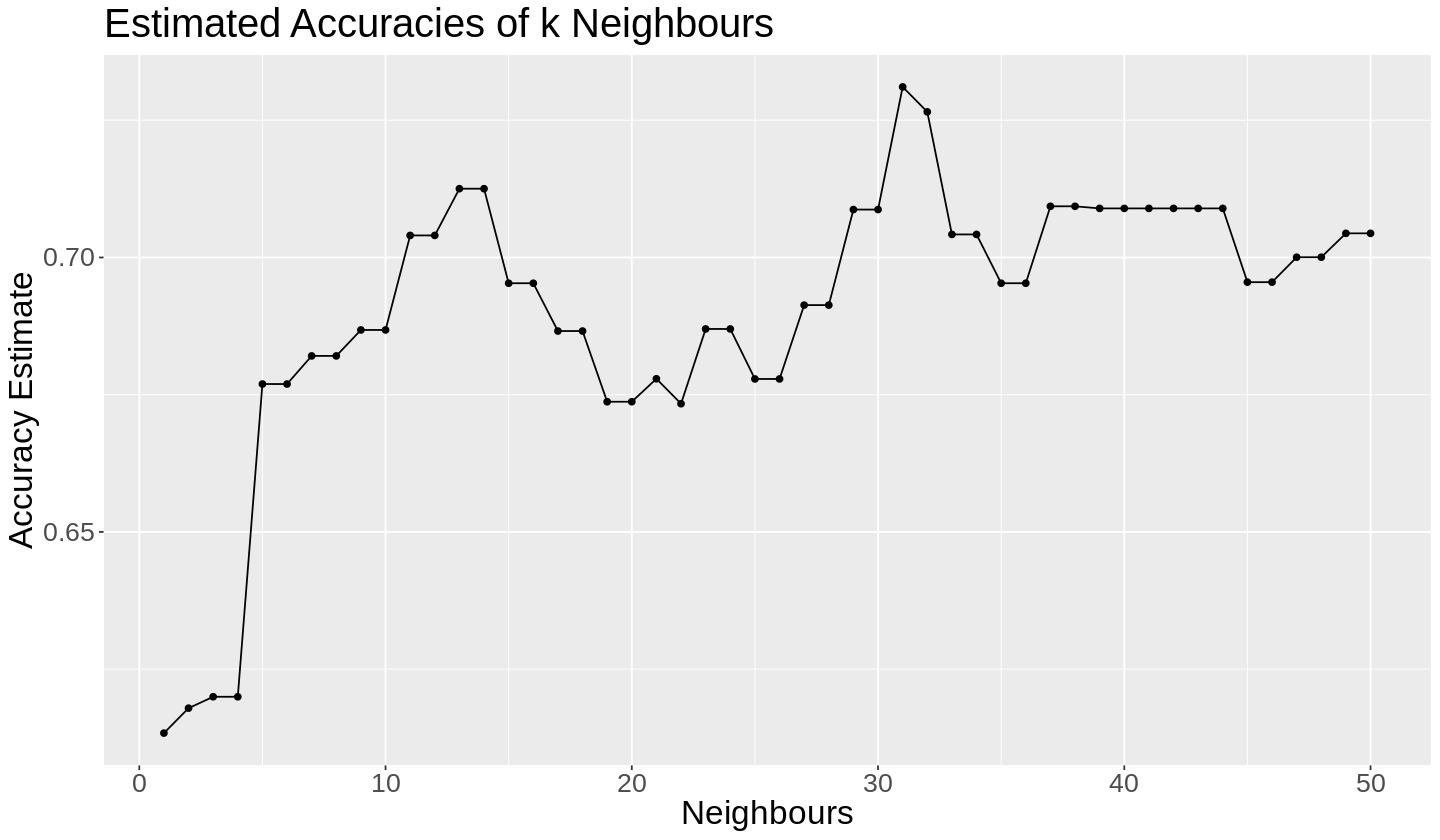

In [20]:
#Estimating accuracies of k neighbours using geom_point plot
set.seed(113)
options(repr.plot.width = 12, repr.plot.height = 7)

cleve_cv_plot <- cleve_result |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of k Neighbours") +
    theme(text = element_text(size = 20))
cleve_cv_plot

### Testing for Accuracy on Testing Set

In [21]:
set.seed(113)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
  set_engine("kknn") |>
  set_mode("classification")

cleve_fit <- workflow() |>
  add_recipe(cleve_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = cleve_training)

cleve_prediction <- predict(cleve_fit, cleve_testing) |> 
    bind_cols(cleve_testing)


cleve_acc <- cleve_prediction |> 
    metrics(truth = diagnosis, estimate = .pred_class) |>
    select(.metric, .estimate) |> 
    head(1)
cleve_acc


cleve_cm <- cleve_prediction |> 
    conf_mat(truth = diagnosis, estimate = .pred_class)
cleve_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.6842105


          Truth
Prediction  0  1
         0 29 12
         1 12 23

### Testing for Overplotting or Underplotting

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

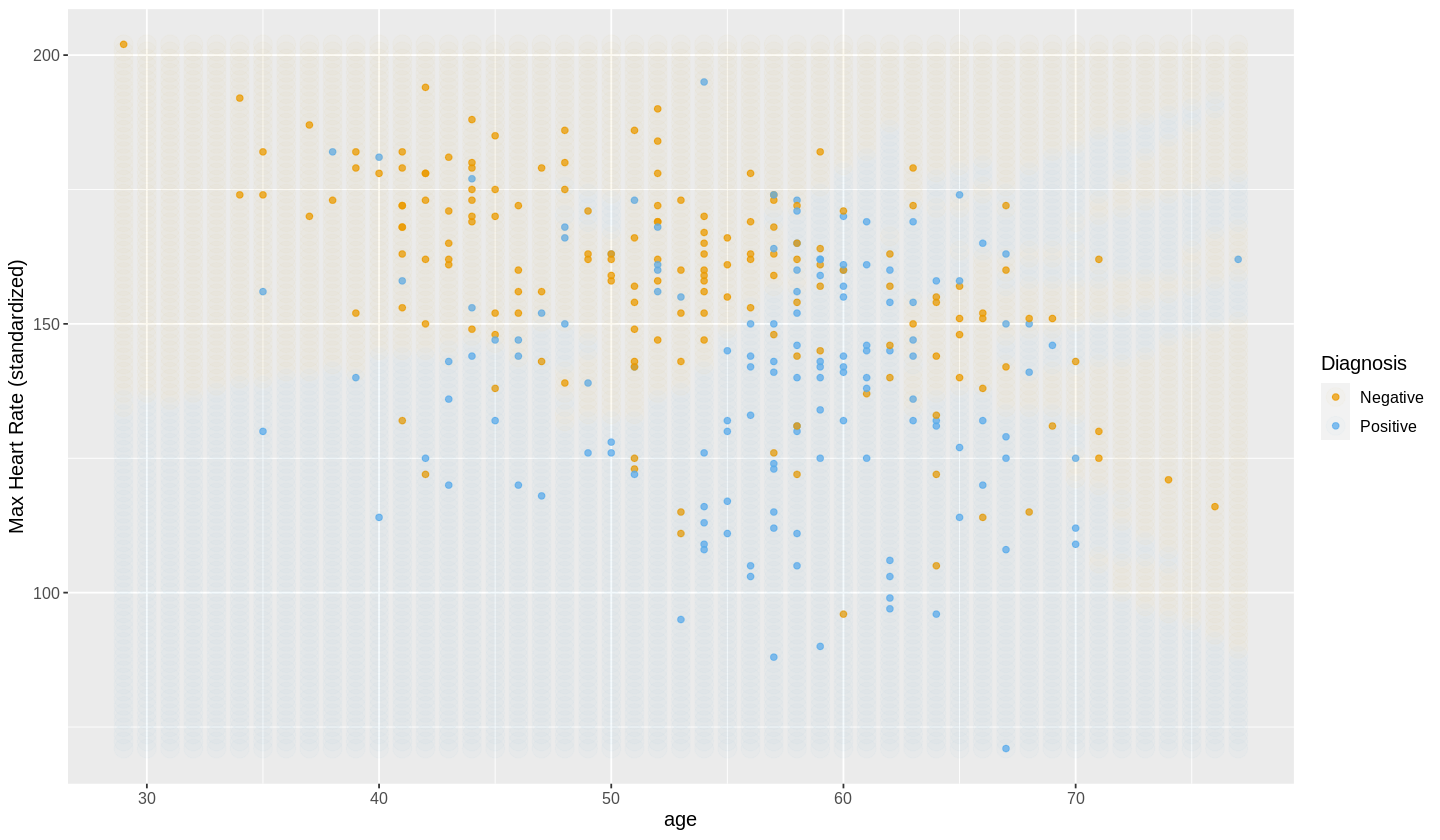

In [22]:

are_grid <- seq(min(cleve_clean$age), 
                max(cleve_clean$age))

smo_grid <- seq(min(cleve_clean$thalach), 
                max(cleve_clean$thalach), 
                length.out = 100)#

asgrid <- as_tibble(expand.grid(age = are_grid, 
                                thalach = smo_grid))#

cleve_recipe2 <- recipe(diagnosis ~ age + thalach, data = cleve_training) |>
    step_scale(all_predictors()) |>
   step_center(all_predictors())
cleve_recipe2

cleve_fit <- workflow() |>
  add_recipe(cleve_recipe2) |>
 add_model(knn_best_spec) |>
fit(data = cleve_training)

knnPredGrid <- predict(cleve_fit, asgrid)


prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
 rename(diagnosis = .pred_class)


wkflw_plot <-
 ggplot() +
geom_point(data = cleve_clean, 
         mapping = aes(x = age,
                      y = thalach,
                      color = diagnosis), 
       alpha = 0.75) +
geom_point(data = prediction_table, 
          mapping = aes(x = age, 
                     y = thalach, 
                      color = diagnosis), 
         alpha = 0.02, 
          size = 5) +
labs(color = "Diagnosis", 
   x = "age", 
   y = "Max Heart Rate (standardized)") +
scale_color_manual(labels = c("Negative", "Positive"), 
                  values = c("orange2", "steelblue2")) +
theme(text = element_text(size = 12))

wkflw_plot

### Discussion 

According to the two numerical variables, age and maximum heart rate, this project performed a K-nn classification and calculated the accuracy of our predictions. We first analyzed the data to explore the correlation between the numeric variables and whether the patient is likely or not likely to have heart disease. Considering the visualizations between the predictors and target variables depicted in ggpairs and box plots, it is deduced that age and maximum heart rate (thalach) has a relatively strong relationship with the target variable. Therefore, we performed a KNN classification with age and maximum heart rate (thalach) as our classifiers. The result was that predicting by age and maximum heart rate displayed the accuracy of 0.65789.  

The results of this project did not align with our expectations. Initially, we predicted that cholesterol and blood pressure would be the two variables that best correlates to the identification of heart disease. However, through more detailed data analysis by creating a ggpairs plot to compare correlation coefficients, age and maximum heart rate ultimately best characterizes the presence of heart disease. 


There are many factors that could have affected the accuracy of the classifier. First, as seen in the ggpairs plot in the data analysis section, none of the correlation coefficient exceeds ±0.4. When the correlation coefficient is near 1 or −1, the linear relationship is strong; when it is near 0, the linear relationship is weak. A coefficient of ±0.4 does not signify a strong relationship and therefore could impact the outcome variable. However, based on previous research, there is evidential bases proving a strong relationship between age, heart rate and likeliness of having heart disease. Thus, the correlation can be still be supported to an extent. In addition, the dataset only contains 303 observations and possible mistakes made can be attributed to the dataset not being large enough, and therefore there was less data in the training set to train the classifier, and less data in the testing set to assess the classifier's accuracy for each K value. It is important to note that this classifer is not generalizable to other datasets and additional processing would have to be made for real world applications. 


The prediction of heart disease helps practitioners make more accurate decisions regarding patients' health. Therefore, the use of machine learning is a solution to reduce and understand the symptoms related to heart disease. Importanly, classifiers can be used as a preliminary predictor in addition to the doctors diagnosis to achieve a high level of accuracy of diagnosis. Predicting the diagnosis of the likeliness of having heart disease by a classification model can help doctors be more effective and faster in diagnosis, resulting in eariler treatment. Early and on-time diagnosing of this problem is very essential for preventing patients from more damage and saving their lives. 


**What future questions could this lead to?**



Expected outcomes and significance:

From our result, it can be seen that even with using the most correlated variables, along with using the most effective amount of vfolds(v = 20 after many trys), using a most accurate k neighbours, and scaling and centering the data, our final accuracy is not as high as what is effective. Such can be seen earlier as well, since the correlation between the variables are not strong in the first place. From the ggpairs graph, we can see that non of the correlation coeffiecent is higher than 0.5 or lower than -0.5. Therefore, the variables itself does not correlate well to begain with. As such, we conclude that from this dataset, heart disease dignosis cannot be predicted to a high degree by looking at other variables or symptoms. We do not see a high causal relationship between heart disease and factors of age, blood pressure, max heart rate, and

Bibliography: 

This project uses data from the Cleveland Clinic Foundation retreived from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

Centers for Disease Control and Prevention. (2023, March 21). Heart disease. Centers for Disease Control and Prevention. Retrieved April 2, 2023, from https://www.cdc.gov/heartdisease/index.htm  

U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved April 2, 2023, from https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease. 


https://ananthbalashankar.github.io/pareto_efficiency.pdf

https://sebastiansauer.github.io/sum-isna/